
MCTA 4362: Machine Learning

Mini Project - Facial Expression Recognition and Analysis

Name: **NOORUL GHOUSIAH BINTI NOORDEEN SAHIB**   Matric No: **2118298**

Name: **NURAIN AINAA AQILAH BINTI ROSLI**   Matric No: **2114650**

# **Import library**

In [1]:
#!pip uninstall tf-keras -y

In [2]:
# Import necessary libraries
import numpy as np
import os
from google.colab import drive


# Check and optionally upgrade TensorFlow
import tensorflow as tf

# Check if the TensorFlow version is different from 2.15.1
if tf.__version__ != '2.15.1':
    # Use os.system to run the pip install command
    os.system('pip install tensorflow==2.15.1')
    # Re-import TensorFlow after upgrading
    import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pickle
from google.colab import files


# **Load pca model, and pre-processed data**

In [4]:
# Load PCA object from a file using pickle
pca_filename = 'pca_modelall256.pkl'
with open(pca_filename, 'rb') as f:
    pca = pickle.load(f)

print("PCA model loaded successfully.")

# Load the transformed training data from the files
with open('X_train_pca.pkl', 'rb') as f:
    X_train_pca = pickle.load(f)

with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('X_test_pca.pkl', 'rb') as f:
    X_test_pca = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

print("Data loaded successfully.")

PCA model loaded successfully.
Data loaded successfully.


# **Check data**


In [5]:
X_train = X_train_pca
X_test = X_test_pca

print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Print shapes of transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print("Shape of y_test:", y_test.shape)

[[-1.0959250e+00 -1.0258157e+00  2.4962573e+00 ...  1.1869043e-02
   2.1361960e-01 -2.2606251e-01]
 [-1.1229572e+01  1.5740504e+00 -4.1937020e-01 ...  1.3956044e-02
  -3.9693832e-02 -4.0665202e-02]
 [ 5.6278858e+00 -3.8441632e+00  1.6656103e+00 ... -1.5636267e-02
  -3.8183600e-01  5.7746582e-02]
 ...
 [ 4.4249070e-01 -1.5431459e+00  4.8019180e+00 ... -1.6061001e-01
   1.2141475e-01  2.9309364e-03]
 [-7.1267567e+00 -1.3529495e+00 -6.0421925e+00 ... -1.7133316e-01
   7.2352394e-02 -6.3512921e-02]
 [ 1.2855503e+01 -3.7133217e+00  3.8734717e+00 ... -6.6047817e-02
  -6.5911449e-02  2.2752982e-01]]
[2 2 4 ... 4 6 4]
[[ 0.63508785  1.5758036   0.34504238 ... -0.02443431  0.26120204
   0.12785786]
 [-1.7384346   1.636279    4.2320137  ... -0.07442738  0.02606991
  -0.0299947 ]
 [ 8.606636   -3.8941123  -2.880326   ...  0.2509587   0.09224761
   0.22003086]
 ...
 [-0.97433186 -2.6831095   1.5788219  ... -0.01624691 -0.17666593
  -0.03865927]
 [-1.5878019  -3.9063964   3.6720455  ...  0.12270572

# **Standardisation**

In [6]:
X_train = X_train_pca
X_test = X_test_pca

# Standardize the PCA-transformed data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **K-means**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter


In [8]:
# K-Means clustering
n_clusters = 7  # Number of clusters (e.g., for 7 facial expressions)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_pca)

with open('kmean.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
files.download('kmean.pkl')

# Get cluster memberships for training and test data
train_clusters = kmeans.predict(X_train_pca).reshape(-1, 1)
test_clusters = kmeans.predict(X_test_pca).reshape(-1, 1)

# Combine original features with cluster memberships

X_train_combined = np.hstack((X_train_pca, train_clusters))
X_test_combined = np.hstack((X_test_pca, test_clusters))

X_train = X_train_combined
X_test = X_test_combined

# Print shapes of transformed data
print("Shape of X_train_pca:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_pca:", X_test.shape)
print("Shape of y_test:", y_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Shape of X_train_pca: (28687, 257)
Shape of y_train: (28687,)
Shape of X_test_pca: (7178, 257)
Shape of y_test: (7178,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


New Cluster Labels for the first 100 data points:
Data point 0: Initial Cluster 0 -> New Cluster 2
Data point 1: Initial Cluster 2 -> New Cluster 2
Data point 2: Initial Cluster 6 -> New Cluster 4
Data point 3: Initial Cluster 6 -> New Cluster 4
Data point 4: Initial Cluster 3 -> New Cluster 0
Data point 5: Initial Cluster 3 -> New Cluster 0
Data point 6: Initial Cluster 6 -> New Cluster 4
Data point 7: Initial Cluster 6 -> New Cluster 4
Data point 8: Initial Cluster 5 -> New Cluster 5
Data point 9: Initial Cluster 0 -> New Cluster 2
Data point 10: Initial Cluster 3 -> New Cluster 0
Data point 11: Initial Cluster 1 -> New Cluster 3
Data point 12: Initial Cluster 0 -> New Cluster 2
Data point 13: Initial Cluster 1 -> New Cluster 3
Data point 14: Initial Cluster 2 -> New Cluster 2
Data point 15: Initial Cluster 2 -> New Cluster 2
Data point 16: Initial Cluster 6 -> New Cluster 4
Data point 17: Initial Cluster 2 -> New Cluster 2
Data point 18: Initial Cluster 3 -> New Cluster 0
Data point

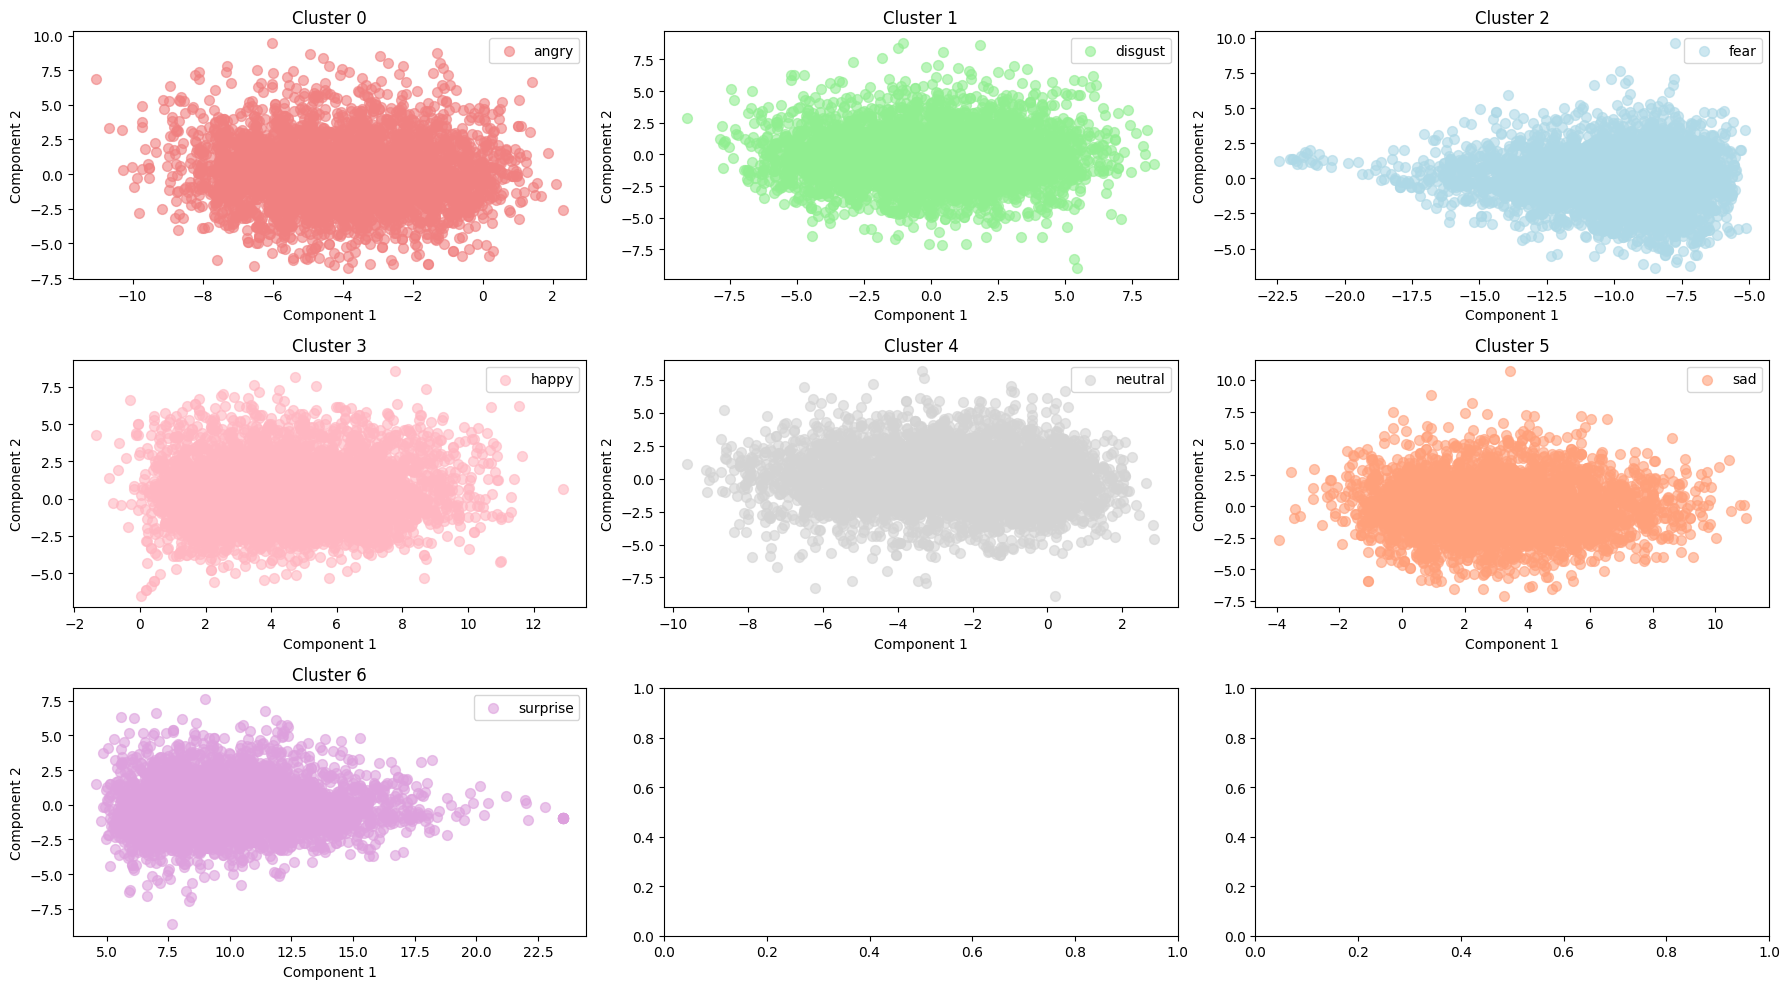

Labeled cluster with emotions:


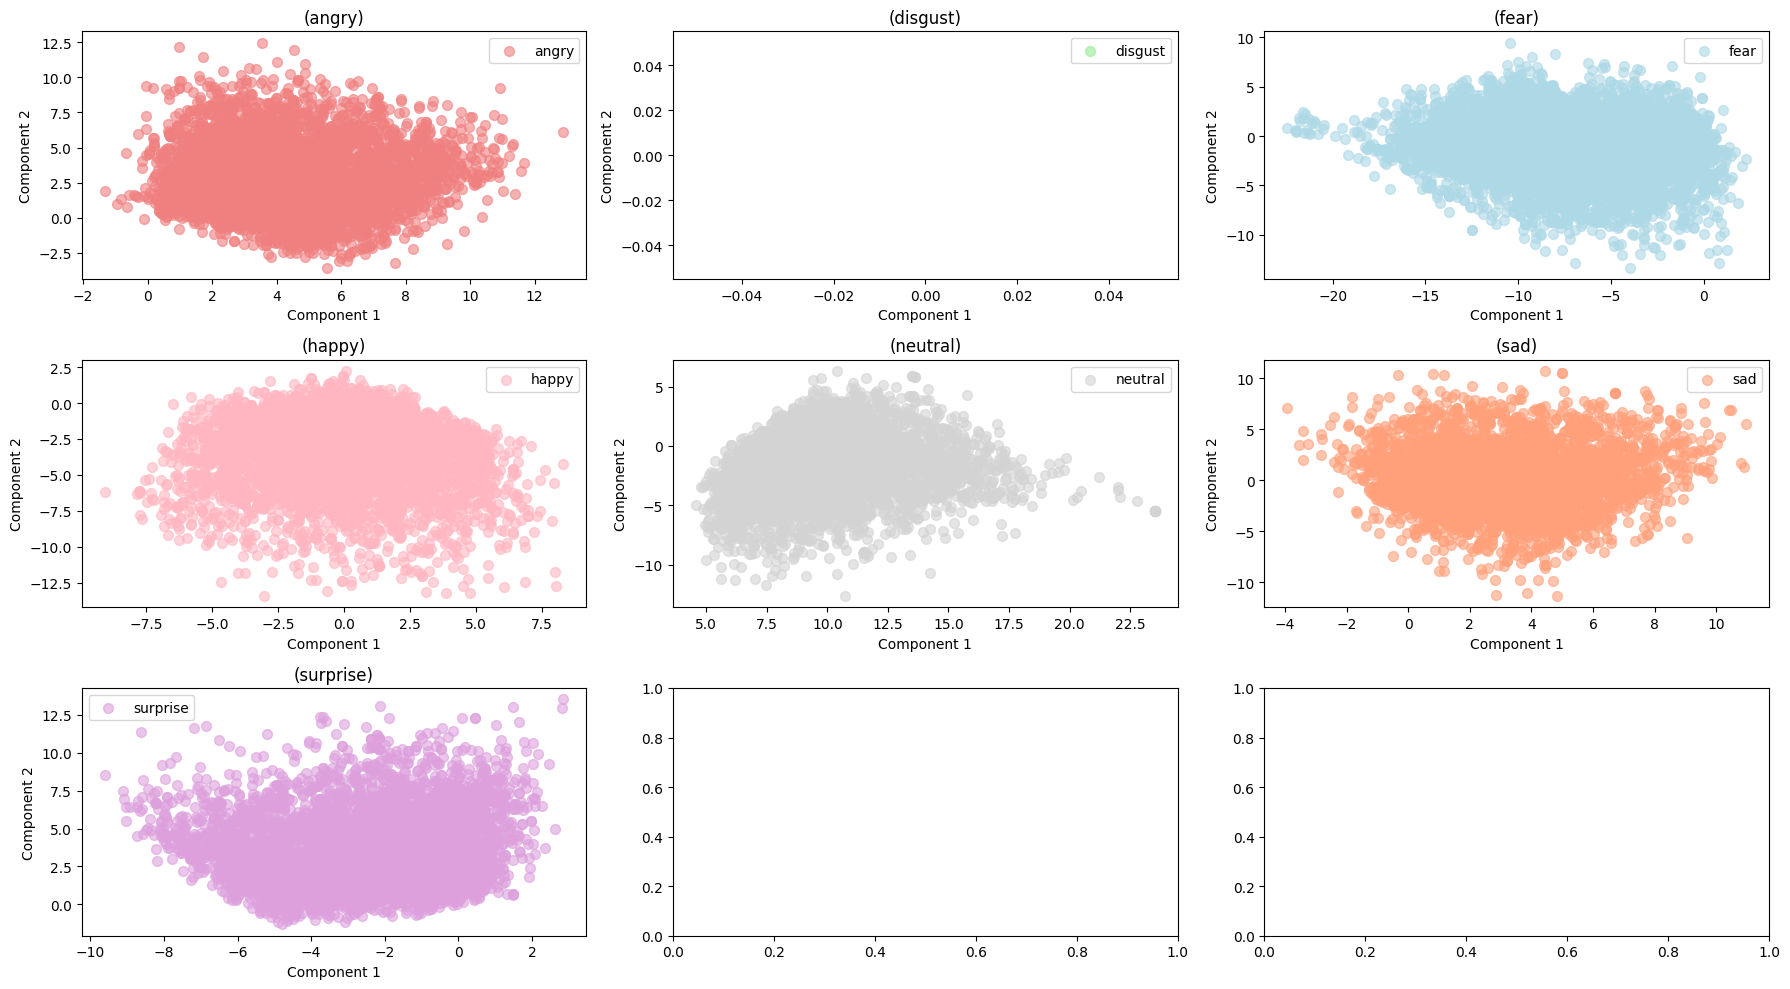

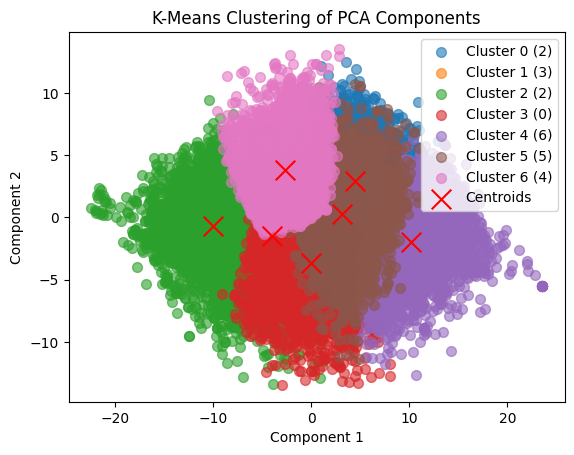

In [12]:
# Plotting the Graph
# Fit KMeans with initial 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

# Initialize a dictionary to store the mapping from initial clusters to majority labels
cluster_to_emotion = {}

# For each cluster, find the nearest 4 labels to each centroid and choose the majority
for cluster_label in range(7):
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(cluster_labels == cluster_label)[0]

    # Calculate distances from each data point to its centroid
    distances = pairwise_distances_argmin_min(X_train_pca[cluster_labels == cluster_label], kmeans.cluster_centers_[cluster_label].reshape(1, -1))[0]

    # Get actual labels for these data points
    actual_labels = y_train[cluster_indices[distances.argsort()][:4]]  # Select nearest 4 labels

    # Find the majority label
    most_common_label = Counter(actual_labels).most_common(1)[0][0]

    # Map the initial cluster to this majority actual label
    cluster_to_emotion[cluster_label] = most_common_label

# Determine the new number of clusters based on the initial number of clusters
num_new_clusters = 7

# Initialize a dictionary to map initial clusters to new clusters based on majority labels
cluster_to_new_cluster = {}
for initial_cluster, emotion_label in cluster_to_emotion.items():
    cluster_to_new_cluster[initial_cluster] = emotion_label

# Map initial cluster labels to new cluster labels
new_cluster_labels = np.array([cluster_to_new_cluster[cluster_label] for cluster_label in cluster_labels])

# Print new cluster labels for the first 100 data points
print("New Cluster Labels for the first 100 data points:")
for i in range(100):
    print(f"Data point {i}: Initial Cluster {cluster_labels[i]} -> New Cluster {new_cluster_labels[i]}")

# Now cluster_to_emotion contains the mapping from initial cluster index to majority emotion label
print("Initial Cluster to Majority Label Mapping:")
print(cluster_to_emotion)

print("")
print("\nNew Cluster Labels based on Majority Label Counts:")
print("Initial Cluster -> New Cluster")
for initial_cluster, new_cluster in cluster_to_new_cluster.items():
    print(f"{initial_cluster} -> {new_cluster}")

# Graph Legend
emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
emotion_colors = ['lightcoral', 'lightgreen', 'lightblue', 'lightpink', 'lightgray', 'lightsalmon', 'plum']

# Plot the results using the new cluster labels
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

for i in range(num_new_clusters):  # Use num_new_clusters directly
    ax = axes[i]
    ax.scatter(X_train_pca[cluster_labels == i, 0], X_train_pca[cluster_labels == i, 4], color=emotion_colors[i], label=f'{emotion_labels[i]}', s=50, alpha=0.6)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend()

plt.tight_layout()
print("Original cluster:")
plt.show()

# Plot the results using the new cluster labels
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

for i in range(num_new_clusters):  # Use num_new_clusters directly
    ax = axes[i]
    ax.scatter(X_train_pca[new_cluster_labels == i, 0], X_train_pca[new_cluster_labels == i, 1], color=emotion_colors[i], label=f'{emotion_labels[i]}', s=50, alpha=0.6)
    ax.set_title(f'({emotion_labels[i]})')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend()

plt.tight_layout()
print("Labeled cluster with emotions:")
plt.show()

# Plot the overall K-means clustering with centroids
for cluster_label in range(num_new_clusters):
    plt.scatter(X_train_pca[new_cluster_labels == cluster_label, 0],
                X_train_pca[new_cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label} ({cluster_to_emotion[cluster_label]})', s=50, alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.title('K-Means Clustering of PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


Evaluation of K means

In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Reshape cluster assignments to be 1D if necessary
train_clusters = train_clusters.reshape(-1)
test_clusters = test_clusters.reshape(-1)

# Assuming you have true labels for your training and test data as y_train and y_test

# Calculate Adjusted Rand Index (ARI)
ari_train = adjusted_rand_score(y_train, train_clusters)
ari_test = adjusted_rand_score(y_test, test_clusters)

# Calculate Normalized Mutual Information (NMI)
nmi_train = normalized_mutual_info_score(y_train, train_clusters)
nmi_test = normalized_mutual_info_score(y_test, test_clusters)

# Calculate Silhouette Score
silhouette_train = silhouette_score(X_train_pca, train_clusters)
silhouette_test = silhouette_score(X_test_pca, test_clusters)

# Print the evaluation metrics
print("Training Data:")
print(f"Adjusted Rand Index (ARI): {ari_train:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_train:.4f}")
print(f"Silhouette Score: {silhouette_train:.4f}")

print("\nTest Data:")
print(f"Adjusted Rand Index (ARI): {ari_test:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_test:.4f}")
print(f"Silhouette Score: {silhouette_test:.4f}")


Training Data:
Adjusted Rand Index (ARI): 0.0093
Normalized Mutual Information (NMI): 0.0161
Silhouette Score: 0.0788

Test Data:
Adjusted Rand Index (ARI): 0.0100
Normalized Mutual Information (NMI): 0.0175
Silhouette Score: 0.0770


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_train contains the true labels for your training data
# Assuming y_train has labels like [0, 1, 2, 3, 4, 5, 6] corresponding to the emotions

# Compute confusion matrix
cm = confusion_matrix(y_train, cluster_labels)

print("Confusion Matrix:")
print(cm)

# Compute accuracy score
accuracy = accuracy_score(y_train, cluster_labels)
print(f"Accuracy Score: {accuracy}")


Confusion Matrix:
[[ 584  651  431  496  611  665  562]
 [  60   55   83   77   67   57   36]
 [ 723  630  749  456  639  539  358]
 [ 811  987  917 1395 1277 1073  749]
 [ 652  657  502  906  733  697  811]
 [ 583  812  474  631  564  878  882]
 [ 567  404  867  401  588  207  133]]
Accuracy Score: 0.1578066720117126


# **Supervised Classification**

**Non-linear SVM Train model**

In [ ]:
from sklearn.svm import SVC
nonlinsvm = SVC(kernel = 'rbf', random_state = 0)
nonlinsvm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
with open('nonlinear_svm_model.pkl', 'wb') as f:
    pickle.dump(nonlinsvm, f)
files.download('nonlinear_svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Predict Test Set Result**

In [ ]:
y_pred_nlsvm = nonlinsvm.predict(X_test)

print("Predicted Output (Categorical):")
print(y_pred_nlsvm)

Predicted Output (Categorical):
[3 3 5 ... 4 6 6]


**Evaluation - Confusion matrix**

Confusion Matrix:
[[ 202    0   92  291  159  176   38]
 [  12    3   13   41   19   20    3]
 [  85    0  231  240  168  212   88]
 [  72    0   61 1260  150  191   40]
 [  59    0   61  332  534  206   41]
 [  84    0  101  311  248  479   24]
 [  38    0   73  127   88   68  437]]

Machine Learning Model Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.21      0.27       958
           1       1.00      0.03      0.05       111
           2       0.37      0.23      0.28      1024
           3       0.48      0.71      0.58      1774
           4       0.39      0.43      0.41      1233
           5       0.35      0.38      0.37      1247
           6       0.65      0.53      0.58       831

    accuracy                           0.44      7178
   macro avg       0.52      0.36      0.36      7178
weighted avg       0.44      0.44      0.42      7178



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

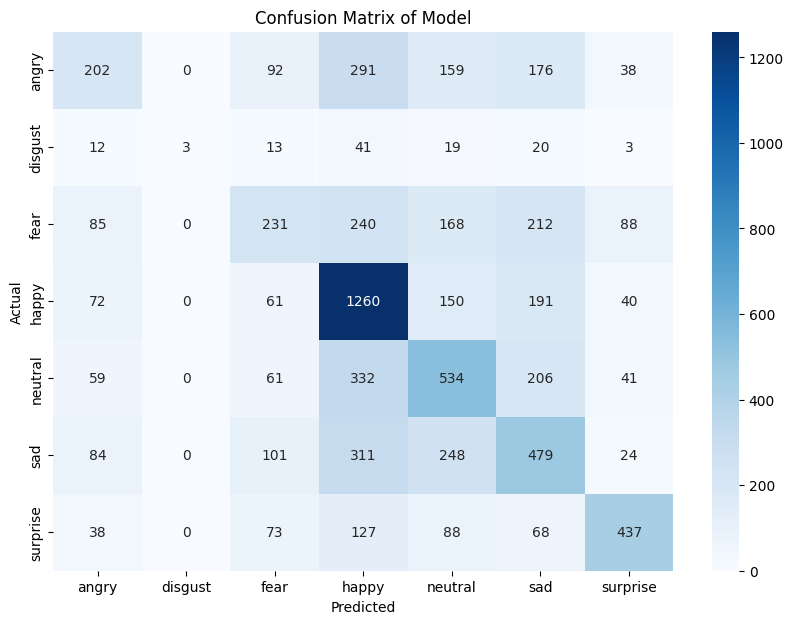

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_nlsvm)
classification_rep = classification_report(y_test, y_pred_nlsvm)

print("Confusion Matrix:")
print(conf_matrix)
print("")
print("Machine Learning Model Classification Report:")
print(classification_rep)




# Save the output to a file
output_filename = 'nlsvm_classification_output.txt'
with open(output_filename, 'w') as f:
    f.write("Confusion Matrix:\n")
    np.savetxt(f, conf_matrix, fmt='%d')
    f.write("\nMachine Learning Model Classification Report:\n")
    f.write(classification_rep)

# Download the file automatically
files.download(output_filename)

# Plot confusion matrix with class labels
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Model')
plt.savefig('nlsvm_confusion_matrix.png')
plt.show()

# Download the confusion matrix plot
files.download('nlsvm_confusion_matrix.png')